<a href="https://colab.research.google.com/github/gongback39/2024_2_Data_analysis/blob/main/1%EB%B6%84%EB%B0%98/1%EC%B0%A8%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8/%EC%9D%B4%EC%A7%80%EB%AF%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://archive.ics.uci.edu/dataset/360/air+quality

In [366]:
import pandas as pd

df = pd.read_csv('/content/AirQualityUCI.csv', delimiter=';', on_bad_lines='skip')

In [367]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


* date
* time
* CO : 시간당 평균 이산화탄소 농도
* PT08.S1 : CO대상 시간당 평균 센서 응답
* NMHC : 시간당 평균 비매탄 탄화수소 농도
* C6H6 : 시간당 벤젠의 평균 농도
* PT08.S2 : NHMC대상 시간당 센서 응답
* NOx : 시간당 질소산화물 농도
* PT08.S3 : NOx대상 시간당 센서 응답
* NO2 : 시간당 이산화질소 농도
* PT08.S4 : 이산화 질소 대상 시간당 센서 응답
* PT08.S5 : O3 대상 시간당 센서 응답
* T : 온도
* RH : 상대 습도
* AH : 절대 습도

# 모든 값이 NaN인 열 삭제

In [368]:
df = df.dropna(axis=1, how='all')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


# 모든 값이 NaN인 열 삭제

In [369]:
df.isna().sum()

,0
Date,114
Time,114
CO(GT),114
PT08.S1(CO),114
NMHC(GT),114
C6H6(GT),114
PT08.S2(NMHC),114
NOx(GT),114
PT08.S3(NOx),114
NO2(GT),114


In [370]:
df = df.dropna(axis=0, how='all')
df.isna().sum()

,0
Date,0
Time,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0


# 1시간 적정 수치
* 이산화 탄소 : 25ppm 이하
* 비매탄 탄화 수소 :
* 벤젠 : 연간 5㎍/㎥이하
* 질소 산화물:
* 이산화질소 : 0.10ppm

https://m.airkorea.or.kr/info/standard/in

In [371]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

## 소수점을 ','롤 표시한거 '.'으로 수정

In [372]:
df.replace({r',': '.'}, regex=True, inplace=True)
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


# 대소 비교를 위한 형변환

In [373]:
df = df.astype(dtype='float64',errors='ignore')
df.dtypes

,0
Date,object
Time,object
CO(GT),object
PT08.S1(CO),float64
NMHC(GT),float64
C6H6(GT),object
PT08.S2(NMHC),float64
NOx(GT),float64
PT08.S3(NOx),float64
NO2(GT),float64


In [374]:
df['CO(GT)'] = df['CO(GT)'].astype("float32")
df['C6H6(GT)'] = df['C6H6(GT)'].astype("float32")
df['T'] = df['T'].astype("float32")
df['RH'] = df['RH'].astype("float32")
df['AH'] = df['AH'].astype("float32")
df.dtypes

,0
Date,object
Time,object
CO(GT),float32
PT08.S1(CO),float64
NMHC(GT),float64
C6H6(GT),float32
PT08.S2(NMHC),float64
NOx(GT),float64
PT08.S3(NOx),float64
NO2(GT),float64


# 이상치 특정 열에 대해 0보다 작은값 처리

In [375]:
df['CO(GT)'].lt(0).sum()

1683

In [376]:
selected_columns = df.columns[2:12].tolist() + df.columns[13:].tolist()
selected_columns

['CO(GT)',
 'PT08.S1(CO)',
 'NMHC(GT)',
 'C6H6(GT)',
 'PT08.S2(NMHC)',
 'NOx(GT)',
 'PT08.S3(NOx)',
 'NO2(GT)',
 'PT08.S4(NO2)',
 'PT08.S5(O3)',
 'RH',
 'AH']

In [377]:
import numpy as np

for column in selected_columns:
  df.loc[df[column] < 0, column] = np.nan

In [378]:
df['CO(GT)'].lt(0).sum()

0

In [379]:
drop_df = df.dropna(axis=0)
print(len(drop_df))
print(len(df))

827
9357


In [380]:
'''
is_CO_na = df['CO(GT)'].isna()
df = df[~((~df['PT08.S1(CO)'].isna()) & is_CO_na)]
is_NMHC_na = df['NMHC(GT)'].isna()
df = df[~((~df['PT08.S2(NMHC)'].isna()) & is_NMHC_na)]
is_NOx_na = df['NOx(GT)'].isna()
df = df[~((~df['PT08.S3(NOx)'].isna()) & is_NOx_na)]
is_NO2_na = df['NO2(GT)'].isna()
df = df[~((~df['PT08.S4(NO2)'].isna()) & is_NO2_na)]
len(df)
'''

"\nis_CO_na = df['CO(GT)'].isna()\ndf = df[~((~df['PT08.S1(CO)'].isna()) & is_CO_na)]\nis_NMHC_na = df['NMHC(GT)'].isna()\ndf = df[~((~df['PT08.S2(NMHC)'].isna()) & is_NMHC_na)]\nis_NOx_na = df['NOx(GT)'].isna()\ndf = df[~((~df['PT08.S3(NOx)'].isna()) & is_NOx_na)]\nis_NO2_na = df['NO2(GT)'].isna()\ndf = df[~((~df['PT08.S4(NO2)'].isna()) & is_NO2_na)]\nlen(df)\n"

In [381]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.900002,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.700001,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.000000,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.000000,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.599998,0.7888


# 온도 이상치 처리

In [382]:
print(df['T'].lt(0).sum())
print(df['T'].lt(-20).sum())
print(df['T'].lt(-50).sum())

379
366
366


In [383]:
df.loc[df['T'] < -20, 'T'] = np.nan

In [384]:
df.isna().sum()

,0
Date,0
Time,0
CO(GT),1683
PT08.S1(CO),366
NMHC(GT),8443
C6H6(GT),366
PT08.S2(NMHC),366
NOx(GT),1639
PT08.S3(NOx),366
NO2(GT),1642


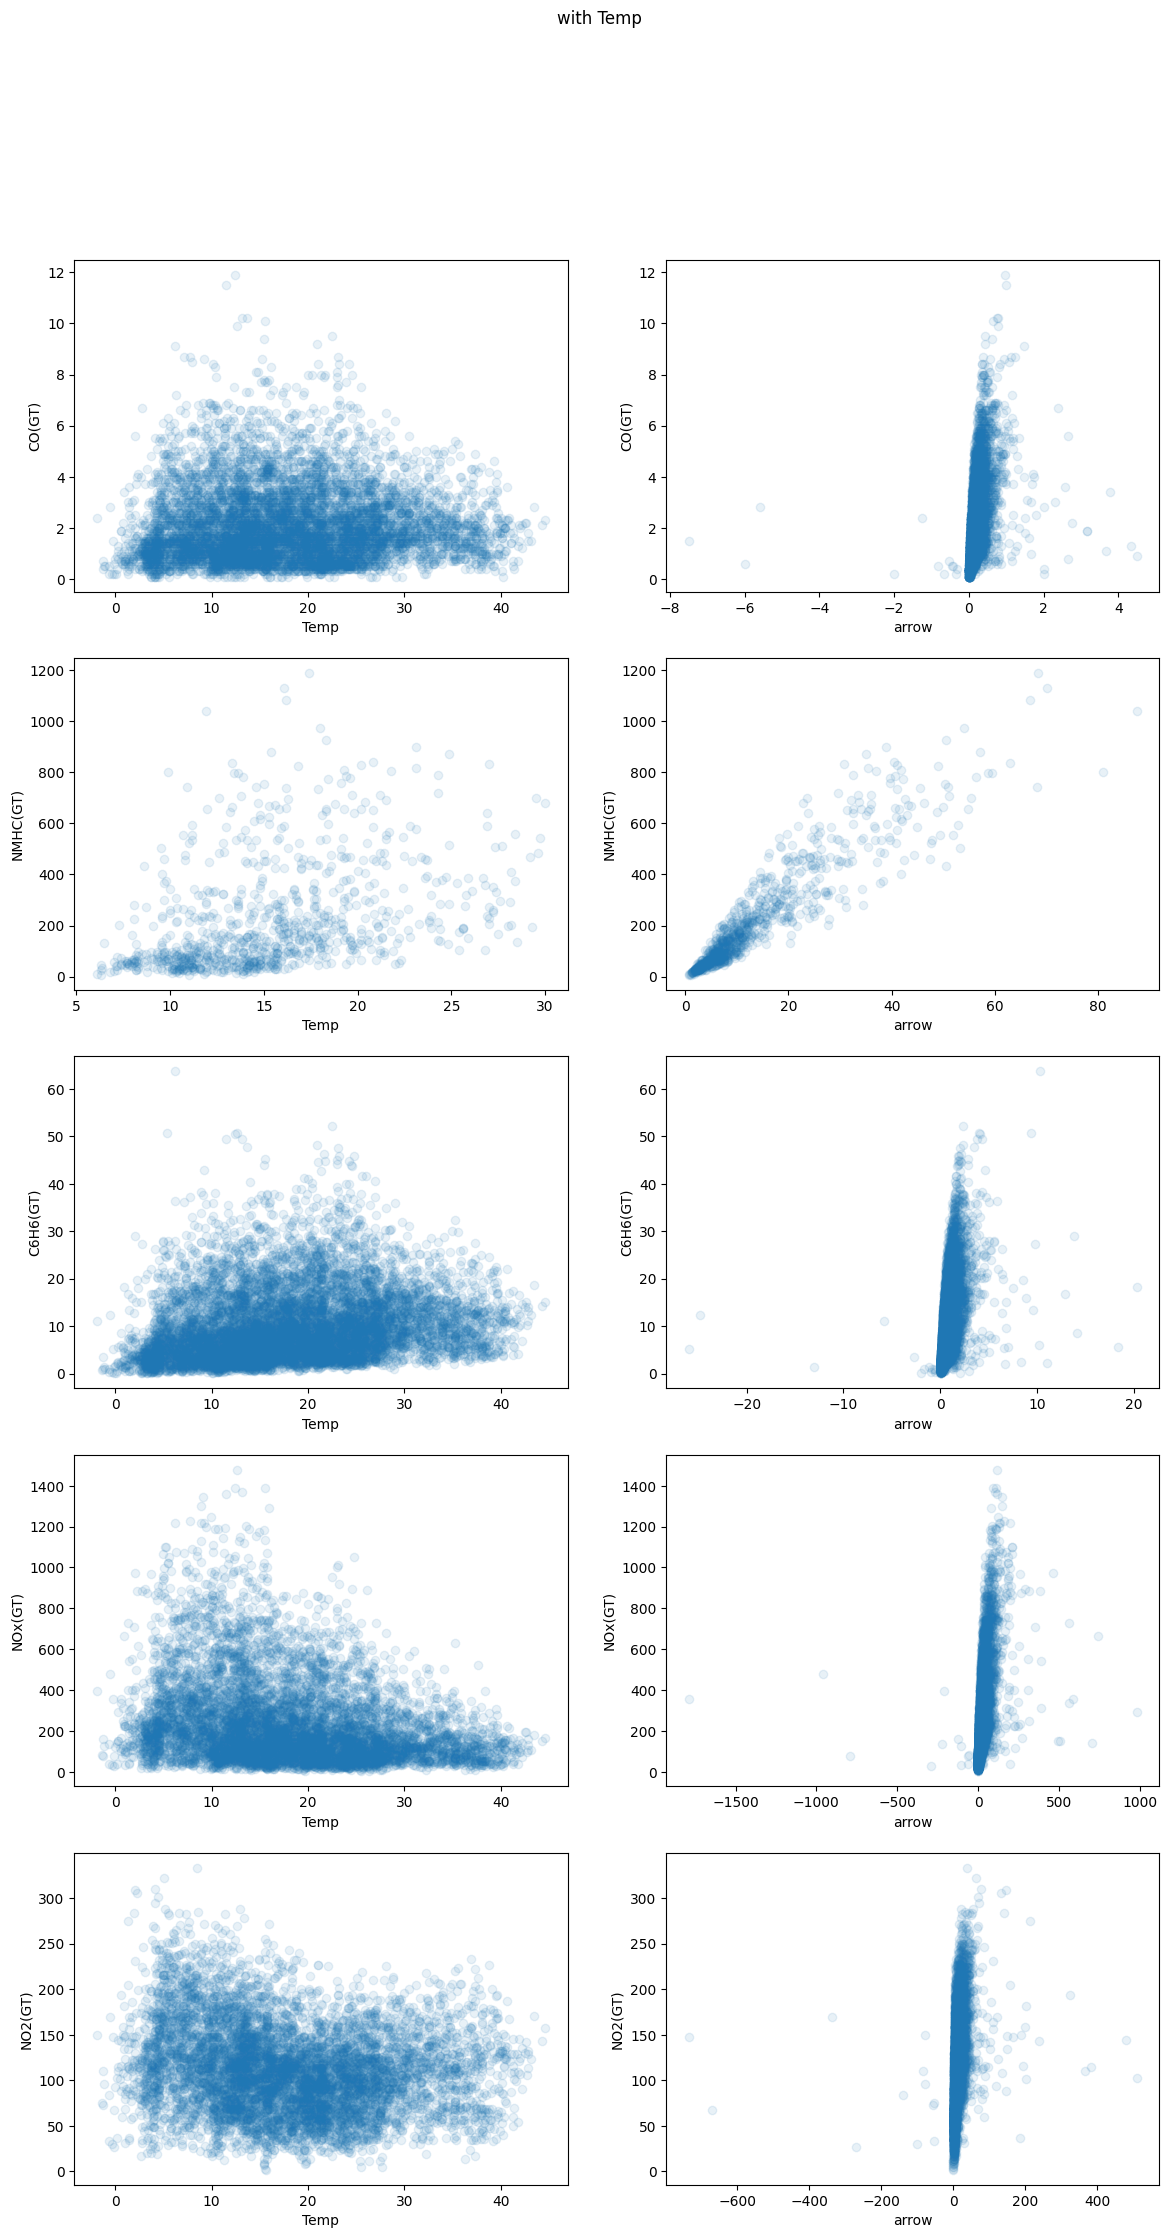

In [385]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5, 2, figsize = (14,25))

substance_index = [2,4,5,7,9]

fig.suptitle('with Temp')
for i in range(5):
  axs[i][0].scatter(df['T'],df[df.columns[substance_index[i]]], alpha = 0.1)
  axs[i][0].set_xlabel('Temp')
  axs[i][0].set_ylabel(df.columns[substance_index[i]])

  arrow = df[df.columns[substance_index[i]]] / df['T']
  axs[i][1].scatter(arrow,df[df.columns[substance_index[i]]], alpha = 0.1)
  axs[i][1].set_xlabel('arrow')
  axs[i][1].set_ylabel(df.columns[substance_index[i]])

fig.show()

In [386]:
fig.savefig('with_temp.png')

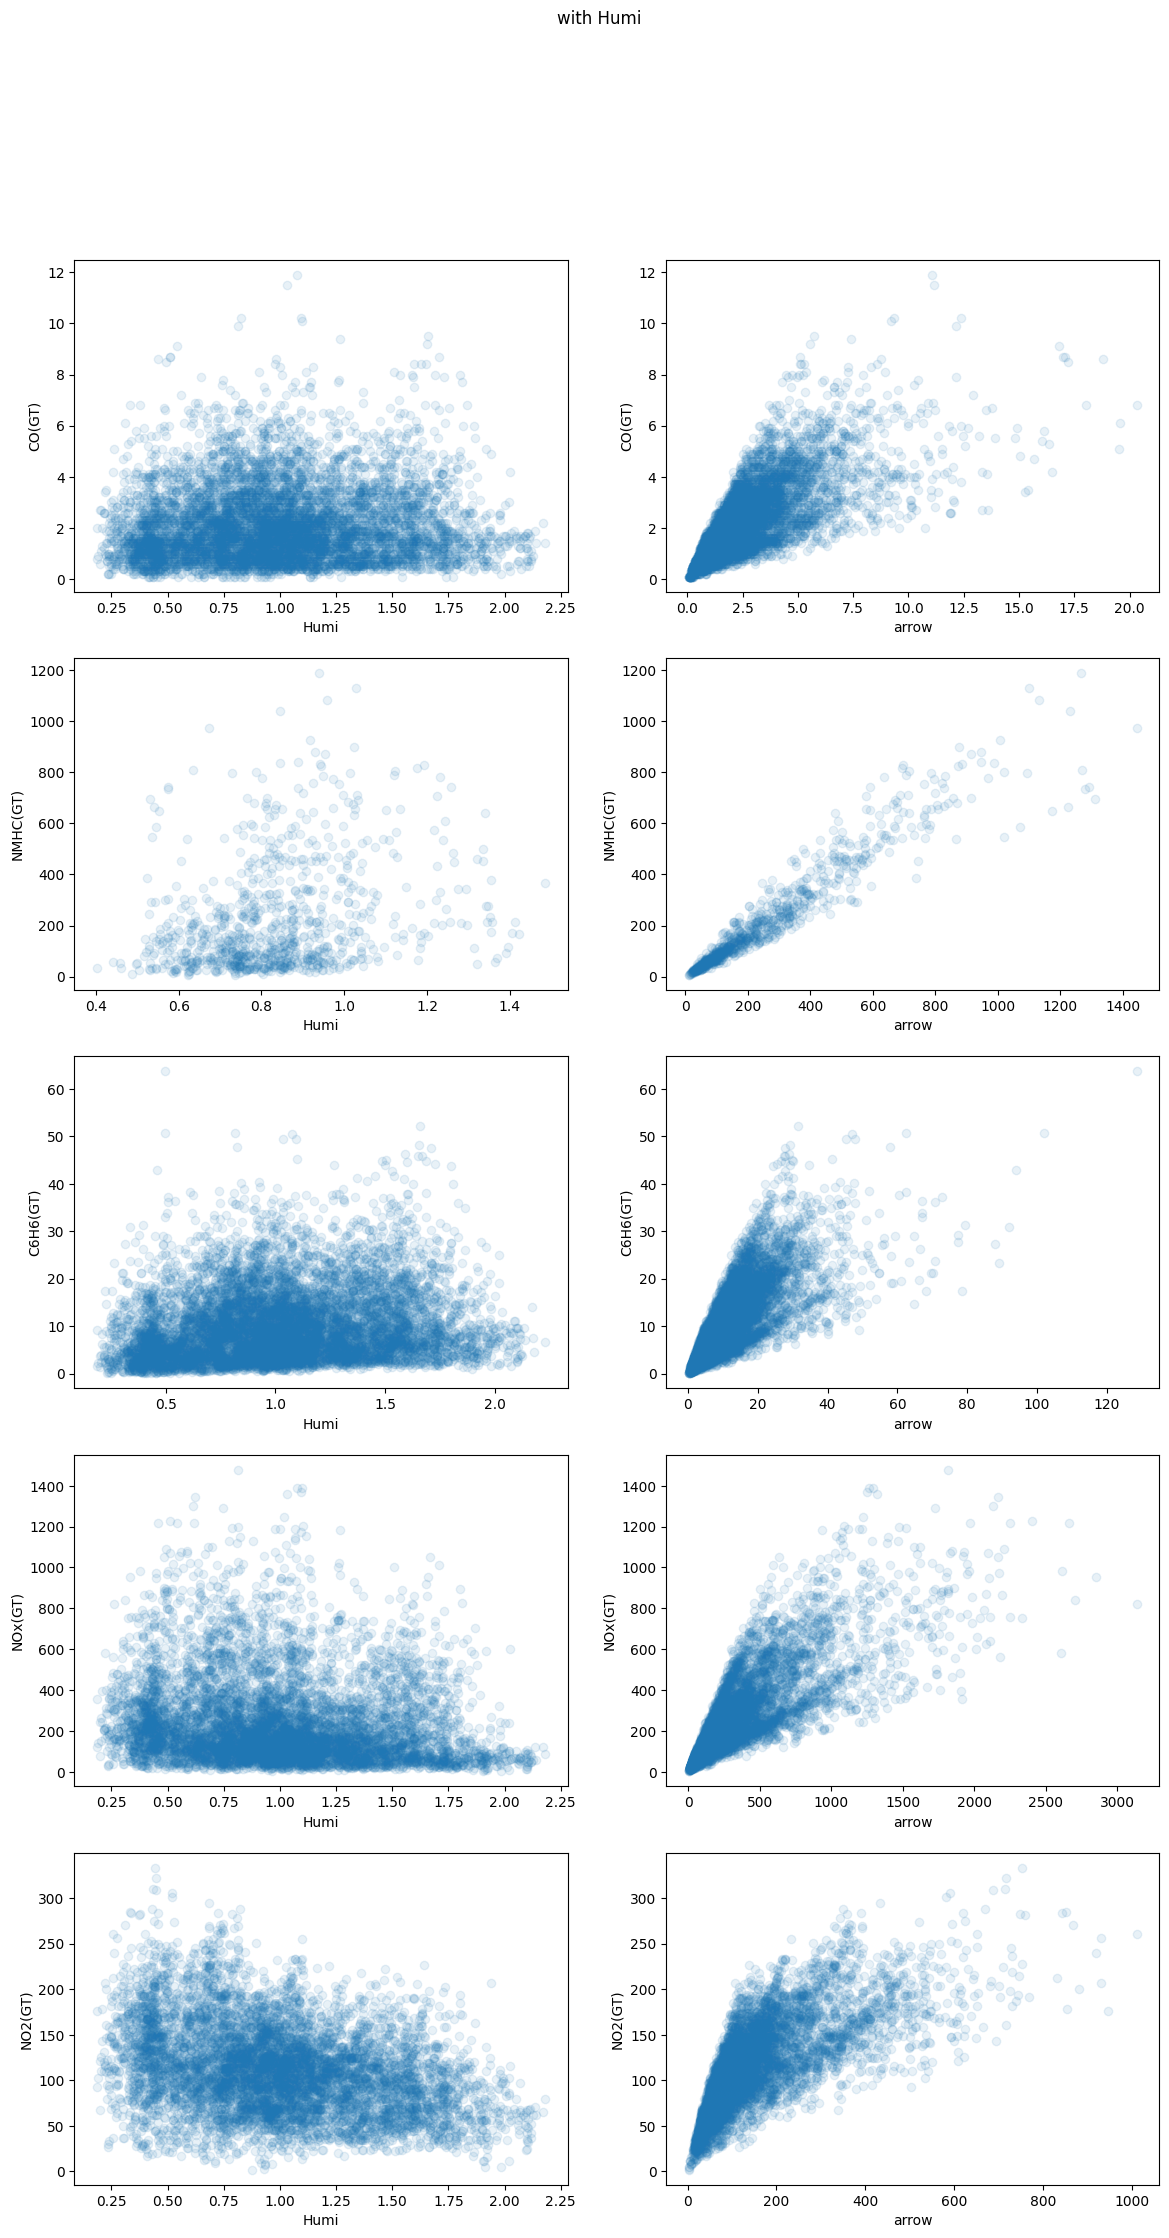

In [387]:
fig, axs = plt.subplots(5, 2, figsize = (14,25))

substance_index = [2,4,5,7,9]

fig.suptitle('with Humi')
for i in range(5):
  axs[i][0].scatter(df['AH'],df[df.columns[substance_index[i]]], alpha = 0.1)
  axs[i][0].set_xlabel('Humi')
  axs[i][0].set_ylabel(df.columns[substance_index[i]])

  arrow = df[df.columns[substance_index[i]]] / df['AH']
  axs[i][1].scatter(arrow,df[df.columns[substance_index[i]]], alpha = 0.1)
  #axs[i].set_xscale('log')
  axs[i][1].set_xlabel('arrow')
  axs[i][1].set_ylabel(df.columns[substance_index[i]])

fig.show()

In [388]:
fig.savefig('with_humi.png')

In [389]:
monthly_df = df.copy()
monthly_df['Date'] = monthly_df['Date'].replace(r'\d{2}/(\d{2})/\d{4}', r'\1', regex=True)
monthly_df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,03,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.900002,0.7578
1,03,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.700001,0.7255
2,03,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.000000,0.7502
3,03,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.000000,0.7867
4,03,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.599998,0.7888


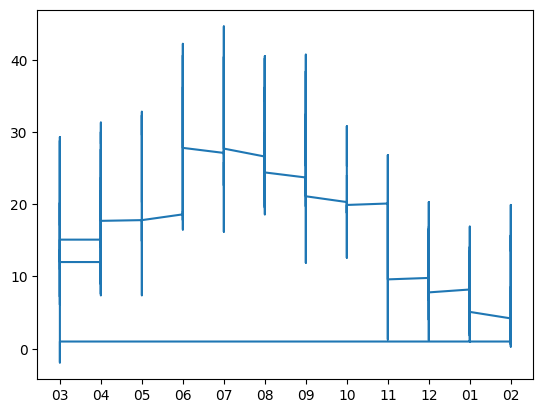

In [390]:
plt.plot(monthly_df['Date'], monthly_df['T'])
plt.show()

In [391]:
selected_columns = monthly_df.columns.isin(['Date', 'T'])
monthly_df = monthly_df.loc[:, selected_columns]
monthly_df.head()

,Date,T
0,03,13.6
1,03,13.3
2,03,11.9
3,03,11.0
4,03,11.2


In [392]:
monthly_df = monthly_df.groupby(by='Date').mean().reset_index()
monthly_df.head()

,Date,T
0,01,8.222694
1,02,7.113591
2,03,13.695850
3,04,16.785130
4,05,20.281233


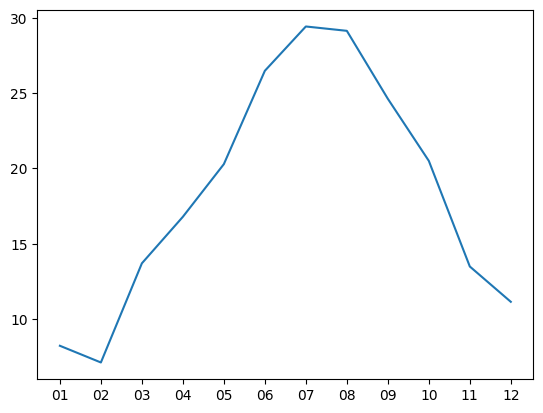

In [393]:
plt.plot(monthly_df['Date'], monthly_df['T'])
plt.show()